<a href="https://colab.research.google.com/github/OseiasBeu/fight_project/blob/main/Pre_Processing_UFC_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detalhamento da base:

## Datasets: 
 ufc_df_o -> Dataset original:
 > Linhas: 4896
 
 > Colunas: 119

 ufc_df_t -> Dataset tratado:
 > Linhas: 4896

 > Colunas: 85 (Sem campos de labels)

 > Colunas:    (Com campos de labels)

 ufc_df_f -> Dataset Final:
 > Linhas: 4896

 > Colunas: 85 (Sem campos de labels)

 > Colunas:    (Com campos de labels)

Tipos de dados contidos:
> bool(1)

> float64(58)

> int64(46)

> object(14)
--- 
## Informações sobre o evento:
- weight_class -> Categoria da luta;
- country -> País onde o evento vai acontecer;
- finish -> Forma de finalização da luta;
- finish_round -> Round de finalização da luta;
- finish_round_time -> Tempo de finalização da luta no round;
- Winner -> Corner vencedor;

--- 

## Informações sobre os lutadores:
- age -> Idade do lutador/a
- age_dif -> Diferença de idade entre os lutadores;
- Stance -> Base de luta do lutador;
- draw -> Número de empates;
- longest_win_streak -> Sequência de vitórias mais longa;
- current_win_streak -> Sequência de vitórias atual;
- current_lose_streak -> Sequência de derrotas atual;
- total_rounds_fought -> Quantidade de rounds já lutados;
- total_title_bouts -> Quantidade de lutas pelo título;
- win_by_Decision_Majority -> Vitória por decisão majoritária;
- win_by_Decision_Split -> Vitória por decisão dividida;
- win_by_Decision_Unanimous -> Vitória por decisão unânime;
- win_by_KO/TKO -> Vitória por nocaute ou nocaute técnico;
- win_by_Submission -> Vitória por submissão;
- win_by_TKO_Doctor_Stoppage -> Vitória por decisão médica;
- wins -> Quantidade de vitórias;
- Weight_lbs -> Peso do atleta em libras;
---


## Campos para remover:
- constant_1
- finish_details
- finish_round_time
- empty_arena
- date
- location
- better_rank
- R_fighter
- B_fighter
- B_odds
- R_odds
- R_ev
- B_ev
- finish
- B_Stance
- R_Stance
- gender
- winner
- country
- age_dif
- total_title_bout_dif
- ko_dif
- sub_dif
- longest_win_streak_dif
- win_dif
- loss_dif
- total_round_dif
- B_avg_SIG_STR_landed
- B_avg_SIG_STR_pct
- R_avg_SIG_STR_landed
- R_avg_SIG_STR_pct
- B_avg_SUB_ATT
- R_avg_SUB_ATT
- B_avg_TD_landed
- B_avg_TD_pct
- R_avg_TD_landed
- R_avg_TD_pct
- sig_str_dif
- avg_sub_att_dif
- avg_td_dif
- r_dec_odds
- b_dec_odds
- r_sub_odds
- b_sub_odds
- r_ko_odds
- b_ko_odds
- height_dif
- reach_dif
- title_bout

--- 

## Campos de classe: 
- Gender
> gender_t : 0 = Male; 1 = Female
- Winner 
> winner_t : 0 = Red; 1 = Blue;
- title_bout:
> title_bout_t : 0 = True; 1 = False;

---
## Campos para labels:
- country_t
- B_Stance 
- R_Stance
- better_rank
- finish ( 7 agrupamentos )


---

## Campos calculados:
- lose_streak_dif
- win_streak_dif
- longest_win_streak_dif
- win_dif
- loss_dif
- total_round_dif
- total_title_bout_dif
- ko_dif
- sub_dif
- height_dif
- age_dif
- sig_str_dif
- avg_sub_att_dif
- avg_td_dif

# Leitura do dataset:

In [142]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import pandas as pd
import numpy as np
from numpy import random
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


SEED = 111
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)

In [143]:
ufc_df_o = pd.read_csv('https://raw.githubusercontent.com/OseiasBeu/fight_project/main/datasets/ufc-master.csv')
ufc_df_o = pd.DataFrame(ufc_df_o)

## Selecionando colunas mais importantes:

In [144]:
ufc_df_t = ufc_df_o[['date', 'B_fighter', 'R_fighter', 'Winner', 'B_current_lose_streak',
       'B_current_win_streak', 'B_longest_win_streak', 'B_losses',
       'B_total_rounds_fought', 'B_total_title_bouts',
       'B_win_by_Decision_Majority', 'B_win_by_Decision_Split',
       'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission',
       'B_win_by_TKO_Doctor_Stoppage', 'B_wins', 'B_Stance', 'B_Height_cms',
       'B_Reach_cms', 'B_Weight_lbs', 'R_current_lose_streak',
       'R_current_win_streak', 'R_longest_win_streak', 'R_losses',
       'R_total_rounds_fought', 'R_total_title_bouts',
       'R_win_by_Decision_Majority', 'R_win_by_Decision_Split',
       'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_wins', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age','R_draw','B_draw']]

In [145]:
ufc_df_t.describe().T

,count,mean,std,min,25%,50%,75%,max
B_current_lose_streak,4896.0,0.477941,0.769386,0.0,0.00,0.00,1.00,6.00
B_current_win_streak,4896.0,0.875408,1.311379,0.0,0.00,0.00,1.00,12.00
B_longest_win_streak,4896.0,1.764910,1.882580,0.0,0.00,1.00,3.00,17.00
B_losses,4896.0,1.726511,2.080347,0.0,0.00,1.00,3.00,15.00
B_total_rounds_fought,4896.0,10.742443,13.056366,0.0,1.00,6.00,15.00,97.00
B_total_title_bouts,4896.0,0.232639,1.022727,0.0,0.00,0.00,0.00,16.00
B_win_by_Decision_Majority,4896.0,0.014502,0.121255,0.0,0.00,0.00,0.00,2.00
B_win_by_Decision_Split,4896.0,0.260417,0.577227,0.0,0.00,0.00,0.00,5.00
B_win_by_Decision_Unanimous,4896.0,0.975490,1.495861,0.0,0.00,0.00,1.00,10.00
B_win_by_KO/TKO,4896.0,0.960989,1.689694,0.0,0.00,0.00,1.00,20.00


# Criar Funções de ETL:

## Função de identificação e remoção de colunas de números constantes no dataset:

In [146]:
def remove_constant_cols(df):
    categorical = list(df.select_dtypes(include=['object']))
    numeric = df.columns.tolist()
    for c in categorical:
        numeric.remove(c)
    
    constants = []
    for col in numeric:
        if min(df[col]) == max(df[col]):
            constants.append(col)
    if len(constants)>0: 
        print(f"removing constants: {constants}")
        return df.drop(columns = constants, axis=1, inplace=True)
    else:print("no constant found")



## Função de redução da dimenssionalidade dos dados:

In [147]:
def perform_pca(df, no_of_components):
    from sklearn.decomposition import PCA
    print("STARTED: dataftame shape:", df.shape, ", PCs requested: ", no_of_components)
    
    pca = PCA()
    pca.n_components = no_of_components
    pca_performed_df = pca.fit_transform(df)
    
    indecies = []
    for i in range(no_of_components):
        indecies.append(f"PCA_{i+1}")
        
    pca_table=pd.DataFrame(pca.components_,columns=df.columns,index=indecies)
    
    pca_components = []
    for i in range(pca_table.shape[0]):
        pc_comp = pca_table.iloc[i,:].abs().idxmax()
        pca_components.append(pc_comp)
        pca_table.drop(pc_comp,axis=1,inplace=True)
        
    pca_table=pd.DataFrame(pca.components_,columns=df.columns,index=indecies)


    col_names=[]
    for i in range(no_of_components):
        col_names.append(f"PC_{i+1}")
        
    print(f"ENDED: PCA-Performed shape: {pca_performed_df.shape}")
    return {"pca_df":pd.DataFrame(pca_performed_df, columns=col_names),
            "pca_table":pca_table,
            "pca_components":pca_components
        }

# Entender quantidade de dados categóricos, numéricos e margem de dados ausentes:

In [148]:
# Entender quantidade de dados categóricos e numéricos:
categorical = list(ufc_df_t.select_dtypes(include=['object']))
numeric = ufc_df_t.columns.tolist()
for c in categorical:
    numeric.remove(c)   
print(f"\n# Categóricos: {len(categorical)}")
print(f"# Numéricos:  {len(numeric)}")

# porcentagem ausente nas colunas
missing = round(ufc_df_t.isnull().sum()/ufc_df_t.shape[0]*100,2)
print(f'\n% Dados ausentes em: {len(missing[missing > 0])} Features:\n{missing[missing > 0]}')


# Categóricos: 6
# Numéricos:  36

% Dados ausentes em: 1 Features:
B_Stance    0.04
dtype: float64


In [149]:
# ufc_df_t.info()

## Tipos de dados contidos no dataframe:

In [150]:
datatypes = ufc_df_o.dtypes.values
datatypes = np.unique(datatypes)

In [151]:
datatypes

array([dtype('bool'), dtype('int64'), dtype('float64'), dtype('O')],
      dtype=object)

# Criando labels:

## Removendo linhas que possuem a coluna Stance nulas:

In [152]:
print(f"% nan em R/B Stance: {round(ufc_df_t['R_Stance'].isnull().sum()/ufc_df_t.shape[0]*100,2)}, {round(ufc_df_t['B_Stance'].isnull().sum()/ufc_df_t.shape[0],2)}. Dropped!")
ufc_df_t.dropna(subset=["R_Stance", "B_Stance"], inplace=True, axis=0)

% nan em R/B Stance: 0.0, 0.0. Dropped!


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Gerando labels para o campo Stance:

In [153]:
toBeEncoded = [17,34]
ufc_encoded = ufc_df_t.iloc[:,toBeEncoded]
ufc_encoded = pd.get_dummies(ufc_encoded)

## Renomeando campo e removendo os espaços:

In [154]:
ufc_encoded.rename(columns={
    "B_Stance_Open Stance": "B_Stance_Open_Stance",
    "R_Stance_Open Stance": "R_Stance_Open_Stance",
    "B_win_by_KO/TKO": "B_win_by_KO_TKO",
    "R_win_by_KO/TKO": "R_win_by_KO_TKO"},inplace=True)
ufc_df_t.drop(ufc_df_t.columns[toBeEncoded], axis=1, inplace=True)
ufc_df_t = pd.concat([ufc_df_t,ufc_encoded],1)
ufc_df_t["date"] = pd.to_datetime(ufc_df_t["date"]) 
ufc_df_t.head(3)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-154-c25741c2f8ff>:7: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,date,B_fighter,R_fighter,Winner,B_current_lose_streak,B_current_win_streak,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,R_draw,B_draw,B_Stance_Open_Stance,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch,B_Stance_Switch,R_Stance_Open_Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,2021-10-02,Johnny Walker,Thiago Santos,Red,0,1,4,2,11,0,0,0,1,4,0,0,5,198.12,208.28,205,3,0,4,8,43,1,0,0,2,11,0,0,13,187.96,193.04,205,29,37,0,0,0,1,0,0,0,0,1,0,0
1,2021-10-02,Niko Price,Alex Oliveira,Blue,2,0,2,5,24,0,0,0,0,4,2,0,6,182.88,193.04,170,2,0,4,8,44,0,0,1,3,4,3,0,11,180.34,193.04,170,32,33,0,0,0,1,0,0,0,0,1,0,0
2,2021-10-02,Krzysztof Jotko,Misha Cirkunov,Blue,1,0,5,5,38,0,0,2,6,1,0,0,9,185.42,195.58,185,1,0,4,4,13,0,0,0,0,1,5,0,6,190.50,195.58,205,32,34,0,0,0,0,1,0,0,0,1,0,0


# Visualizando medidas dos lutadores:

In [155]:

fighter_measures = ufc_df_t.iloc[:,np.array([17,18,19,33,34,35])] 


fighter_height = list(pd.concat([fighter_measures["B_Height_cms"],fighter_measures["R_Height_cms"]],0)) 
fighter_reach = list(pd.concat([fighter_measures["B_Reach_cms"],fighter_measures["R_Reach_cms"]],0)) 
fighter_weight = list(pd.concat([fighter_measures["B_Weight_lbs"],fighter_measures["R_Weight_lbs"]],0)) 


fighter_measures=pd.DataFrame(data={'height':fighter_height,'reach':fighter_reach,'weight':fighter_weight})
fighter_measures.dropna(inplace=True) #don't need nan here
print(fighter_measures.head())


fig = go.Figure()
fig.add_trace(go.Box(y=fighter_measures["height"], name='height',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=fighter_measures["reach"], name = 'reach',
                marker_color = 'lightseagreen'))
fig.update_layout(
    title="Height & Reach BoxPlots",
    xaxis_title="Body Measures",
    yaxis_title="Cms",
)

   height   reach  weight
0  198.12  208.28     205
1  182.88  193.04     170
2  185.42  195.58     185
3  177.80  177.80     155
4  175.26  172.72     145


<ipython-input-155-fc361e917eb2>:4: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

<ipython-input-155-fc361e917eb2>:5: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

<ipython-input-155-fc361e917eb2>:6: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



% Missing in 0 Features:
Series([], dtype: float64)


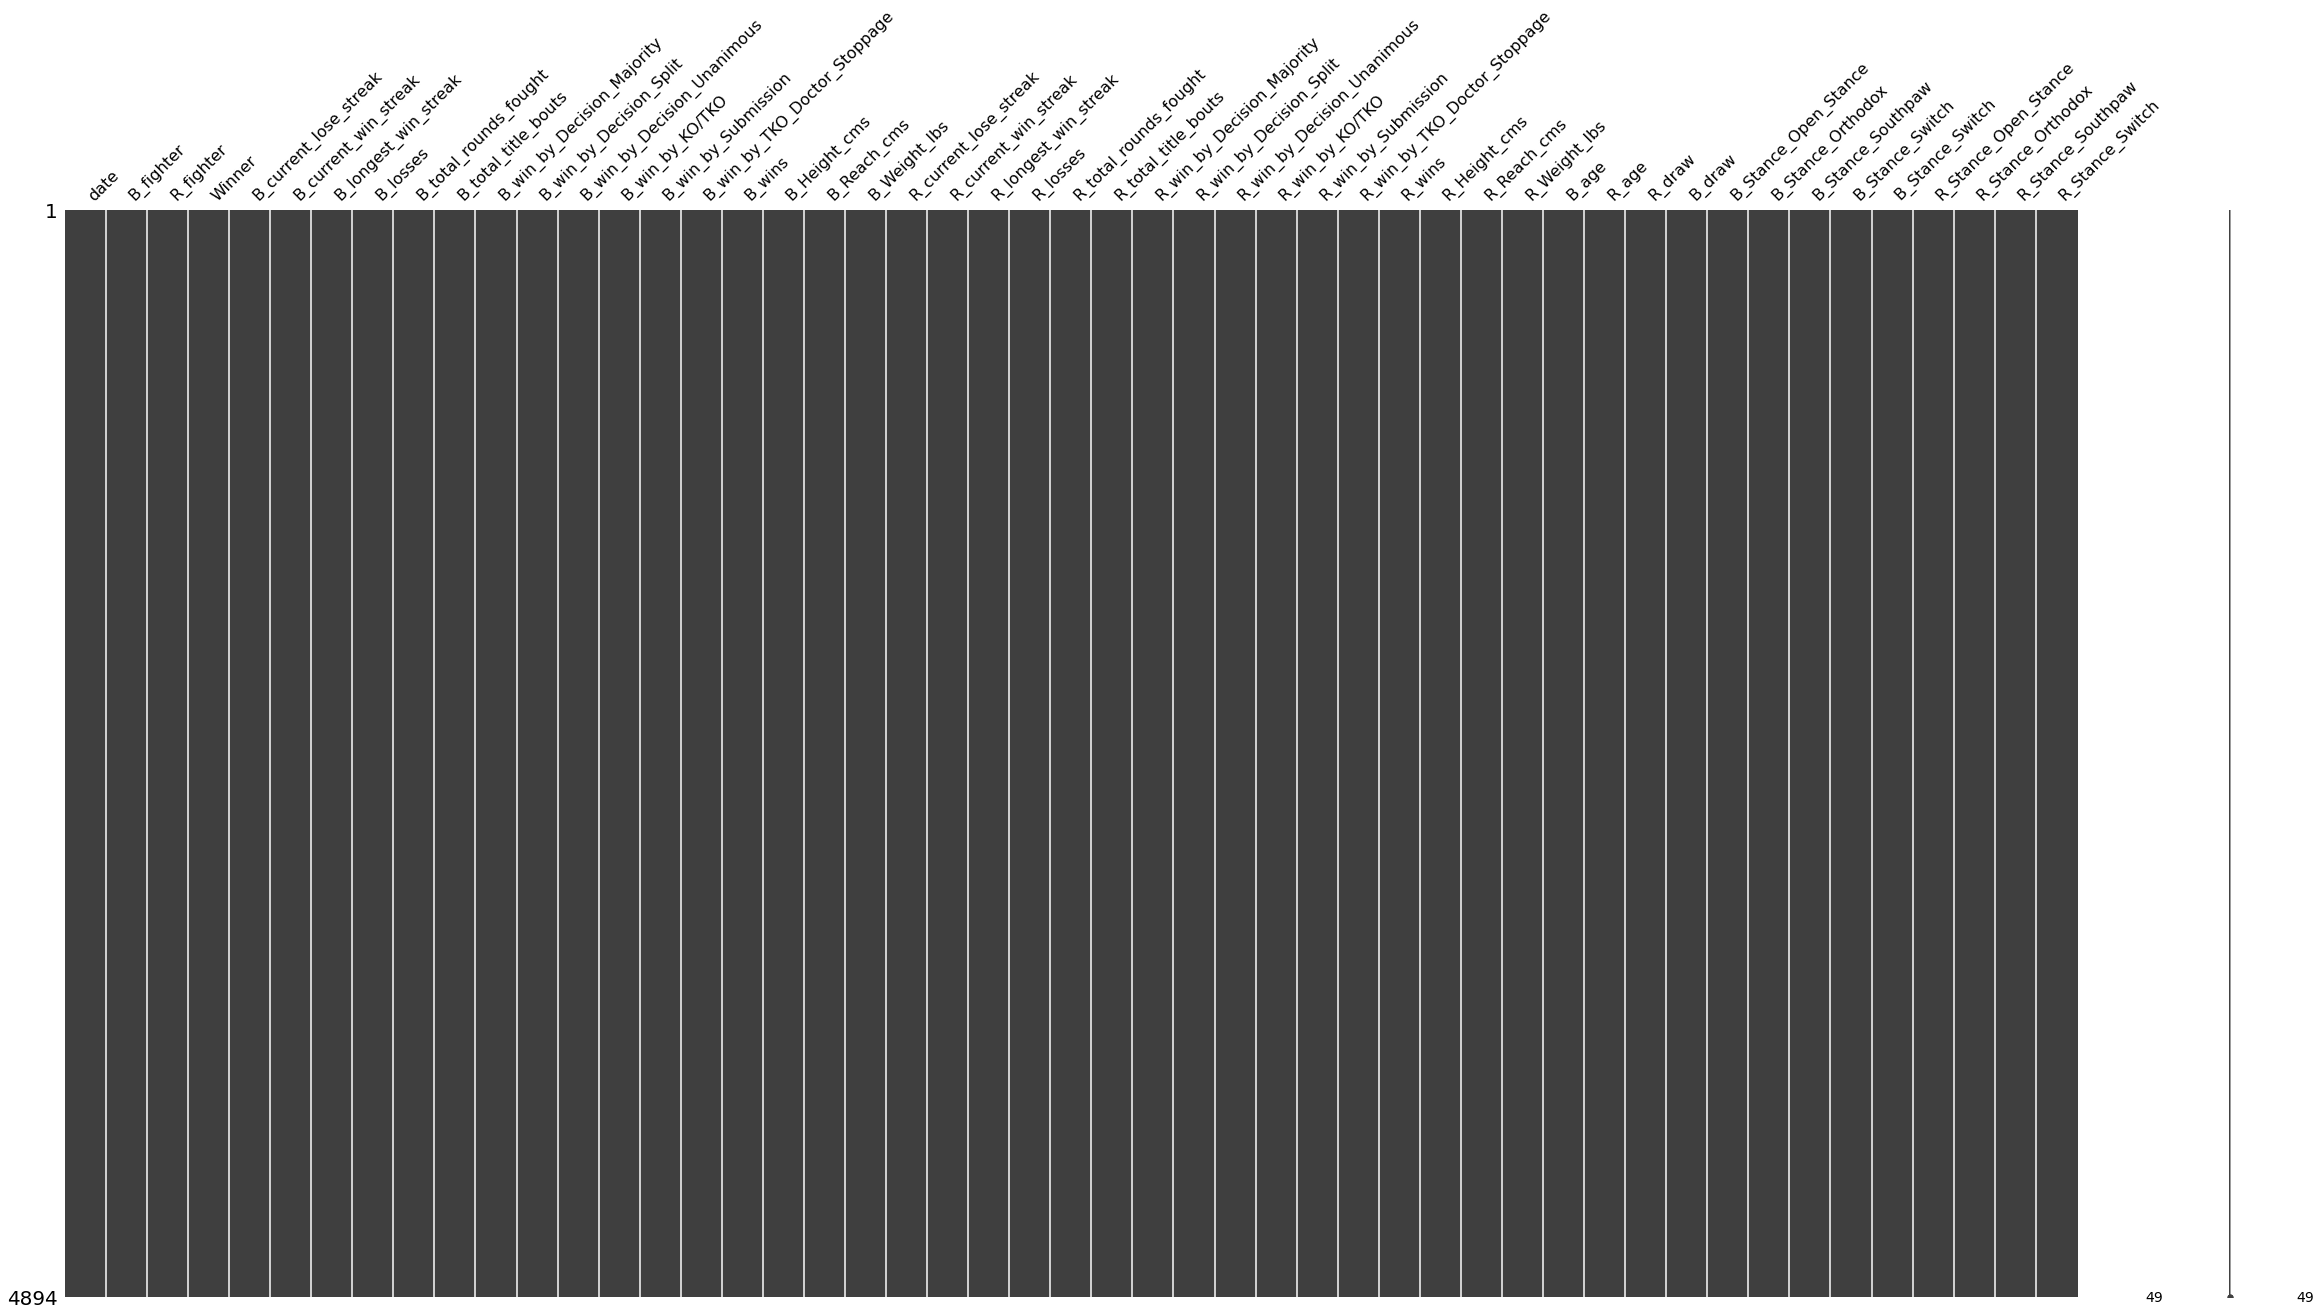

In [156]:
missing = round(ufc_df_t.isnull().sum()/ufc_df_t.shape[0]*100,2)
print(f'% Missing in {len(missing[missing > 0])} Features:\n{missing[missing > 0]}')
msno.matrix(ufc_df_t,figsize=(40,20))

In [157]:
cols = ['weight_class','B_Stance','R_Stance','better_rank','finish']

print(f'Dimensão ANTES de gerar as features: {ufc_df_o.shape}')
ufc_df_o = pd.get_dummies(ufc_df_o, columns=cols)
print(f'Dimensão DEPOIS de gerar features: {ufc_df_o.shape}')

Dimensão ANTES de gerar as features: (4896, 119)
Dimensão DEPOIS de gerar features: (4896, 146)


In [158]:
def remove_constant_cols(df):
    categorical = list(df.select_dtypes(include=['object']))
    numeric = df.columns.tolist()
    for c in categorical:
        numeric.remove(c)
    
    constants = []
    for col in numeric:
        if min(df[col]) == max(df[col]):
            constants.append(col)
    if len(constants)>0: 
        print(f"removing constants: {constants}")
        return df.drop(columns = constants, axis=1, inplace=True)
    else:print("no constant found")

In [159]:
remove_constant_cols(ufc_df_t)

no constant found


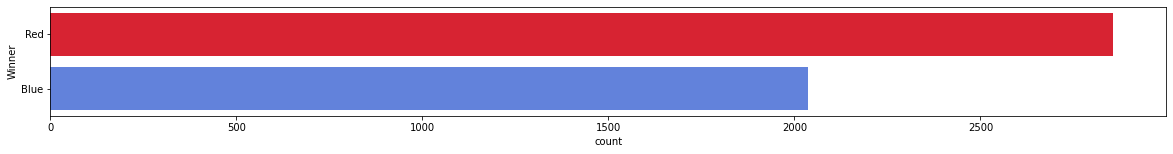

In [160]:
plt.figure(figsize=(20,2))
sns.countplot(y="Winner", data=ufc_df_t,palette=["#f50519","#4e79ef"])

# Montando tabela de correlação:

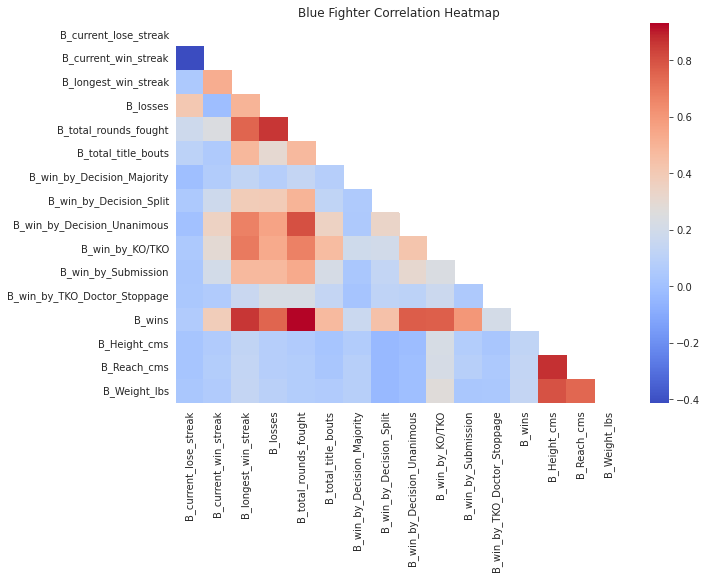

In [161]:
plt.figure(figsize=(10,7))
corr = ufc_df_t.iloc[:,3:20].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=False,cmap="coolwarm").set_title("Blue Fighter Correlation Heatmap")


In [162]:
ufc_df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4894 entries, 0 to 4895
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          4894 non-null   datetime64[ns]
 1   B_fighter                     4894 non-null   object        
 2   R_fighter                     4894 non-null   object        
 3   Winner                        4894 non-null   object        
 4   B_current_lose_streak         4894 non-null   int64         
 5   B_current_win_streak          4894 non-null   int64         
 6   B_longest_win_streak          4894 non-null   int64         
 7   B_losses                      4894 non-null   int64         
 8   B_total_rounds_fought         4894 non-null   int64         
 9   B_total_title_bouts           4894 non-null   int64         
 10  B_win_by_Decision_Majority    4894 non-null   int64         
 11  B_win_by_Decision_Split       

# Separar datasets:

In [163]:
# reorder columns
a = np.arange(0,20).tolist()
a.extend([36])
a.extend(np.arange(38,42))
a.extend(np.arange(20,36))
a.extend([37,42,43,44,45])
UFC_processado  = ufc_df_t.iloc[:,a]

# encode blue=1 & red=0
UFC_processado["Winner"] = UFC_processado["Winner"].replace(["Blue", "Red"], [1,0]).values

# shuffle data
UFC_processado = UFC_processado.sample(frac=1, random_state=SEED).reset_index(drop=True)

# separate 5% as test set
test_rows = np.arange(0,0.05*len(UFC_processado.index)).tolist()
UFC_TESTE = UFC_processado.iloc[test_rows].reset_index(drop=True)

# remaining as training set for models
UFC_TREINO = UFC_processado.drop(test_rows, inplace=False, axis=0) # remove test from dataset
UFC_TREINO.reset_index(drop=1, inplace=True)


print(f"UFC_processado shape: {UFC_processado.shape}")
print(f"UFC_TESTE shape: {UFC_TESTE.shape}")
print(f"UFC_TREINO shape: {UFC_TREINO.shape}")
print("----------------------")
print(UFC_processado.info())
print("----------------------")

UFC_processado.head()

UFC_processado shape: (4894, 46)
UFC_TESTE shape: (245, 46)
UFC_TREINO shape: (4649, 46)
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          4894 non-null   datetime64[ns]
 1   B_fighter                     4894 non-null   object        
 2   R_fighter                     4894 non-null   object        
 3   Winner                        4894 non-null   int64         
 4   B_current_lose_streak         4894 non-null   int64         
 5   B_current_win_streak          4894 non-null   int64         
 6   B_longest_win_streak          4894 non-null   int64         
 7   B_losses                      4894 non-null   int64         
 8   B_total_rounds_fought         4894 non-null   int64         
 9   B_total_title_bouts           4894 non-null   int6

<ipython-input-163-1ac79a8ca11a>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,B_fighter,R_fighter,Winner,B_current_lose_streak,B_current_win_streak,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,B_age,R_draw,B_draw,B_Stance_Open_Stance,B_Stance_Orthodox,R_current_lose_streak,R_current_win_streak,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_Stance_Southpaw,B_Stance_Switch,B_Stance_Switch,R_Stance_Open_Stance
0,2014-02-22,TJ Waldburger,Mike Pyle,0,1,0,2,3,12,0,0,0,1,0,3,0,4,180.34,190.50,170,25,0,0,0,1,1,0,4,4,23,0,0,1,2,3,2,0,8,182.88,187.96,170,38,0,0,0,0
1,2013-11-16,Ali Bagautinov,Tim Elliott,1,0,1,1,0,3,0,0,0,0,1,0,0,1,162.56,165.10,125,28,0,0,0,1,0,2,2,1,9,0,0,0,2,0,0,0,2,170.18,167.64,135,26,0,0,0,0
2,2021-05-22,Jared Vanderaa,Justin Tafa,1,1,0,1,1,3,0,0,0,0,1,0,0,1,193.04,203.20,260,29,0,0,0,1,1,0,1,2,5,0,0,0,0,1,0,0,1,182.88,187.96,264,27,0,0,0,0
3,2019-04-20,Rafael Fiziev,Magomed Mustafaev,0,0,0,0,0,0,0,0,0,0,0,0,0,0,172.72,180.34,155,26,0,0,0,0,1,0,2,1,5,0,0,0,0,1,0,1,2,172.72,180.34,155,30,0,1,0,0
4,2019-02-02,David Teymur,Charles Oliveira,0,0,5,5,0,13,0,0,0,3,2,0,0,5,175.26,185.42,155,29,0,0,0,0,0,3,4,9,40,0,0,0,1,0,12,0,13,177.80,187.96,155,29,1,0,0,0


In [164]:
UFC_processado.to_csv("UFC_processado.csv",index=False)
UFC_TESTE.to_csv("UFC_TESTE.csv",index=False)
UFC_TREINO.to_csv("UFC_TREINO.csv",index=False) 

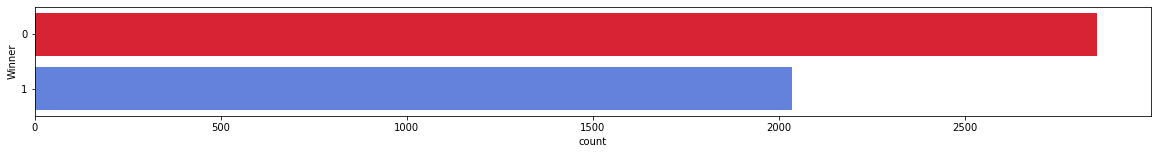

In [165]:
plt.figure(figsize=(20,2))
sns.countplot(y="Winner", data=UFC_processado,palette=["#f50519","#4e79ef"])

# Verificar Correlação:

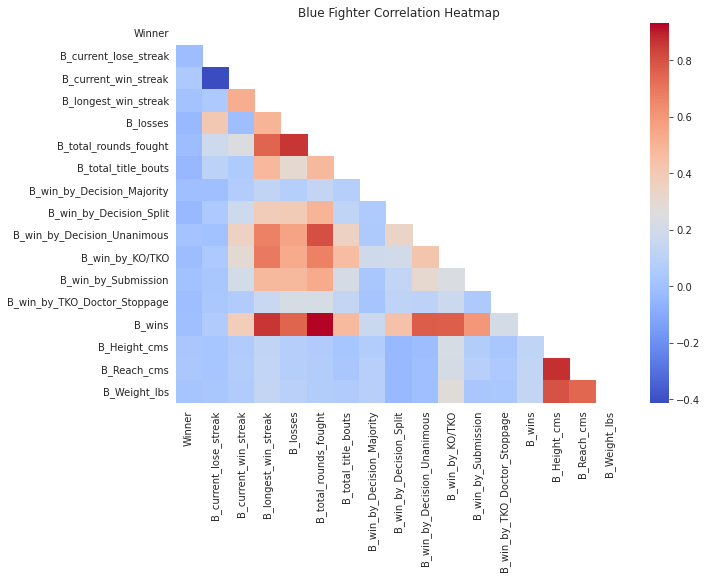

In [166]:
plt.figure(figsize=(10,7))
corr = UFC_processado.iloc[:,3:20].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=False,cmap="coolwarm").set_title("Blue Fighter Correlation Heatmap")

In [167]:
UFC_PCA = perform_pca(ufc_df_t.iloc[:,4:],10)["pca_df"]
UFC_PCA = pd.concat([UFC_processado[["date","Winner","B_fighter","R_fighter"]],UFC_PCA],1) # concat Winner
UFC_PCA.to_csv("UFC_PCA.csv",index=False)
UFC_PCA.head()

STARTED: dataftame shape: (4894, 45) , PCs requested:  10
ENDED: PCA-Performed shape: (4894, 10)


<ipython-input-167-aa3664cd1b6d>:2: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,date,Winner,B_fighter,R_fighter,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,2014-02-22,0,TJ Waldburger,Mike Pyle,65.301744,24.195152,14.316249,-13.908486,-9.484423,-7.006680,-3.250711,2.446403,-0.721361,-0.114368
1,2013-11-16,1,Ali Bagautinov,Tim Elliott,12.725206,32.417369,2.138084,-11.483418,-0.047830,-0.245468,-1.413483,-2.252484,-2.153865,2.044197
2,2021-05-22,1,Jared Vanderaa,Justin Tafa,48.333990,10.227754,-25.890427,-7.818273,8.665891,-10.283130,-2.611611,1.736273,-3.273779,-3.000121
3,2019-04-20,0,Rafael Fiziev,Magomed Mustafaev,-14.841064,-4.263534,6.447467,-0.639081,1.965746,1.725758,-2.322875,-1.349182,2.931644,2.762464
4,2019-02-02,0,David Teymur,Charles Oliveira,-23.376255,-1.643923,-12.432875,3.883351,6.081386,-3.497132,-0.627388,0.400521,4.022375,1.711923
